# Figures of AU-emotion mappings project
Non-computational figures can be found in the `misc_figures.ipynb` notebook. Code to run the analyses that result in the data visualized in this notebook is stored in the `src/analysis` directory of this repository.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# For t-tests
from scipy.stats import ttest_ind, ttest_rel

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['figure.facecolor'] = "white"

In [2]:
# Some preprocessing utils + plotting parameters
map2leg = {
    'Darwin': 'Darwin\n(1886)',
    'Matsumoto2008': 'Matsumoto et al.\n(2008)',
    'Keltner2019': 'Keltner et al.\n(2019)',
    'Cordaro2018ref': 'Cordaro et al.\n(2018; ref.)',
    'Cordaro2018IPC': 'Cordaro et al.\n(2018; ICP)',
    'Ekman': 'Friesen &\nEkman (1978)',
    'JackSchyns': 'Jack et al.\n(2012)',
}

map_names = list(map2leg.values())
emo_names = ['anger', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
au_names = np.loadtxt('../data/au_names_new.txt', dtype=str)

## Figure 3: Prediction
Plot train set prediction performance per mapping (A) and split by culture (B).

In [3]:
# Load in theory-driven scores (scores.tsv) and cross-validated data-driven scores (scores_js.tsv)
df = pd.read_csv('../results/scores.tsv', sep='\t', index_col=0)
df_js = pd.read_csv('../results/scores_js.tsv', sep='\t', index_col=0)
df_js = df_js.query("model_ethnicity == 'all'").drop('model_ethnicity', axis=1)
df = pd.concat((df, df_js), axis=0)
df = df.replace(map2leg)

# Add average across emotions to df for plotting (rightmost panel)
df_av = df.groupby(['mapping', 'sub', 'sub_ethnicity']).mean().reset_index()
df = pd.concat([df, df_av.assign(emotion='average')], axis=0)

nc = pd.read_csv('../results/noise_ceiling.tsv', sep='\t', index_col=0)
nc_av = nc.groupby(['sub_ethnicity', 'sub_split', 'trial_split']).mean().reset_index().assign(emotion='average')
nc_ = pd.concat((nc, nc_av), axis=0)
nc_all = nc_.query("sub_split == 'train' & trial_split == 'train' & sub_ethnicity == 'all'")
nc_ethn = nc_.query("sub_split == 'train' & trial_split == 'train' & sub_ethnicity != 'all'")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Emotion = anger, t-value: 0.354, p-value: 0.72376
Emotion = disgust, t-value: 9.621, p-value: 0.00000
Emotion = fear, t-value: 5.052, p-value: 0.00000
Emotion = happy, t-value: -6.106, p-value: 0.00000
Emotion = sadness, t-value: -1.532, p-value: 0.12606
Emotion = surprise, t-value: 9.530, p-value: 0.00000
Emotion = average, t-value: 5.093, p-value: 0.00000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


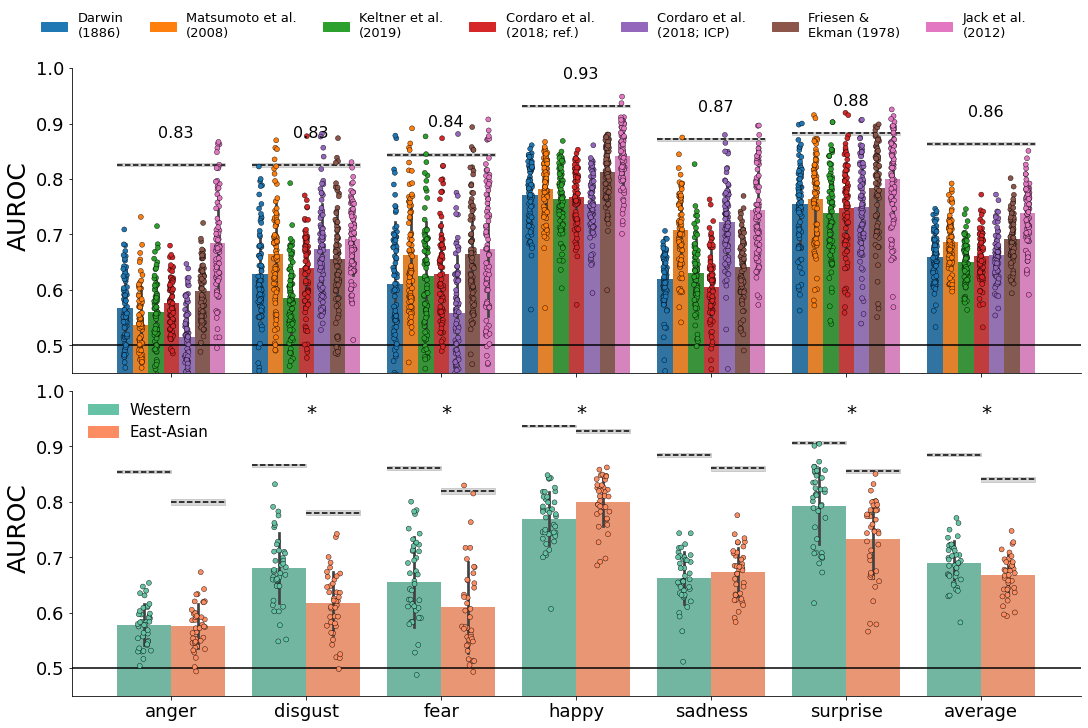

In [4]:
fig, axes = plt.subplots(figsize=(15, 10), nrows=2, constrained_layout=True, sharex=True, sharey=True)
ax = axes[0]
ax = sns.barplot(x='emotion', y='score', data=df, hue='mapping',
                 ax=ax, ci='sd', hue_order=map_names)

ax = sns.stripplot(x='emotion', y='score', hue='mapping',
                   edgecolor='black', linewidth=0.4, data=df, ax=ax,
                   dodge=True, jitter=True, hue_order=map_names)

ax.set_xlabel('')
ax.set_ylabel('AUROC', fontsize=25, )
ax.yaxis.set_label_coords(-0.04, 0.55)

n_tk = df['mapping'].unique().size
for i, emo in enumerate(emo_names + ['average']):
    this_nc = nc_all.query("emotion == @emo")['noise_ceiling'].item()
    this_sd = nc_all.query("emotion == @emo")['sd'].item()
    ax.plot(np.linspace(i-0.4, i+0.4, num=n_tk), [this_nc] * n_tk, c='k', ls='--')
    ax.fill_between(
        np.linspace(i-0.4, i+0.4, num=n_tk),
        [this_nc - this_sd] * n_tk, [this_nc + this_sd] * n_tk,
        color='gray', alpha=0.3
    )
    ax.text(i - 0.1, this_nc + 0.05, f'{this_nc:.2f}', fontsize=16)

# Some aesthetics
ax.set_facecolor('white')
ax.set_ylim(0.45, 1)
ax.axhline(0.5, c='k', ls='-')
ax.legend_.remove()
colors = {mapp: sns.color_palette()[i] for i, mapp in enumerate(map_names)}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
legend = ax.legend(handles, labels, ncol=7, loc=(-0.035, 1.075), frameon=False, fontsize=13)

ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)

ax = axes[1]
df_av_map = df.groupby(['emotion', 'sub_ethnicity', 'sub']).mean().reset_index()
hue_order = ['WC', 'EA']
ax = sns.barplot(x='emotion', y='score', data=df_av_map, hue='sub_ethnicity', palette='Set2',
                 ax=ax, ci='sd', hue_order=hue_order, order=emo_names + ['average'])

ax = sns.stripplot(x='emotion', y='score', hue='sub_ethnicity', palette='Set2',
                   edgecolor='black', linewidth=0.4, data=df_av_map,
                   dodge=True, jitter=True, hue_order=hue_order, order=emo_names + ['average'])

ax.set_xlabel('')
ax.set_ylabel('AUROC', fontsize=25, )
ax.yaxis.set_label_coords(-0.04, 0.55)

# Some aesthetics
ax.set_facecolor('white')
ax.set_ylim(0.45, 1)
ax.axhline(0.5, c='k', ls='-')

colors = {name: sns.color_palette('Set2')[i] for i, name in enumerate(['Western', 'East-Asian'])}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
legend = plt.legend(handles, labels, loc=(0.01, 0.82), frameon=False, fontsize=15)

ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)

for i, emo in enumerate(emo_names + ['average']):
    ea = df.query("emotion == @emo & sub_ethnicity == 'EA'")
    wc = df.query("emotion == @emo & sub_ethnicity == 'WC'")
    tval, pval = ttest_ind(wc['score'].dropna(), ea['score'].dropna())
    print(f"Emotion = {emo}, t-value: {tval:.3f}, p-value: {pval:.5f}")    
    if pval < 0.05:
        ax.text(i, 0.95, '*', fontsize=20)

for i, emo in enumerate(emo_names + ['average']):
    
    for ii, ethn in enumerate(['WC', 'EA']):
        this_nc = nc_ethn.query("sub_ethnicity == @ethn & emotion == @emo")['noise_ceiling'].item()
        this_sd = nc_ethn.query("sub_ethnicity == @ethn & emotion == @emo")['sd'].item()
        ax.plot(np.linspace(i-0.4 + ii * 0.4, i + ii * 0.4, num=n_tk), [this_nc] * n_tk, c='k', ls='--')

        ax.fill_between(
            np.linspace(i-0.4 + ii * 0.4, i + ii * 0.4, num=n_tk),
            this_nc - this_sd, this_nc + this_sd,
            color='gray', alpha=0.3
        )

sns.despine()
fig.set_constrained_layout_pads(h_pad=0.2)
plt.savefig('figure_3.png', dpi=400, facecolor='white')


Split by ethnicity, shown per mapping:

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15), constrained_layout=True, sharex=False, sharey=True, nrows=4, ncols=2)
hue_order = ['WC', 'EA']
for i, mapp in enumerate(df['mapping'].unique()):
    ax = axes.flatten()[i]
    this_df = df.query("mapping == @mapp")

    ax = sns.barplot(x='emotion', y='score', data=this_df, hue='sub_ethnicity', palette='Set2',
                    ax=ax, ci='sd', hue_order=hue_order, order=emo_names + ['average'])

    ax = sns.stripplot(x='emotion', y='score', hue='sub_ethnicity', palette='Set2',
                    edgecolor='black', linewidth=0.4, data=this_df, ax=ax,
                    dodge=True, jitter=True, hue_order=hue_order, order=emo_names + ['average'])

    ax.set_xlabel('')
    ax.legend_.remove()
    
    # Some aesthetics
    ax.set_facecolor('white')
    ax.set_ylim(0.45, 1)
    ax.axhline(0.5, c='k', ls='-')
    
    if i == 0:
        colors = {name: sns.color_palette('Set2')[i] for i, name in enumerate(['Western', 'East-Asian'])}
        labels = list(colors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        legend = ax.legend(handles, labels, loc=(0.01, 0.85), frameon=False, fontsize=13)

    ax.tick_params(axis='y', labelsize=16)
    ax.text(6.5, 0.975, mapp.replace('\n', ' '), fontsize=20, ha='right', va='center')
    if i in [5, 6]:
        ax.tick_params(axis='x', labelsize=16, rotation=45)
    else:
        ax.set_xticklabels([])
    
    if i % 2 == 0:
        ax.set_ylabel("AUROC", fontsize=16, labelpad=5)
    else:
        ax.set_ylabel('')
    for ii, emo in enumerate(emo_names + ['average']):
        ea = this_df.query("emotion == @emo & sub_ethnicity == 'EA'")
        wc = this_df.query("emotion == @emo & sub_ethnicity == 'WC'")
        tval, pval = ttest_ind(ea['score'].dropna(), wc['score'].dropna())
        #print(f"Emotion = {emo}, t-value: {tval:.3f}, p-value: {pval:.5f}")    
        if pval < 0.05:
            ax.text(ii, 0.9, '*', ha='center', fontsize=20)

axes[-1, -1].axis('off')
sns.despine()
fig.set_constrained_layout_pads(h_pad=0.25, w_pad=0.25)
plt.savefig('figure_S1.png', bbox_inches='tight', dpi=400, facecolor='white')

## Explanation figure

In [ ]:
df_abl = pd.read_csv('../results/scores_ablation.tsv', sep='\t', index_col=0)
df_abl = df_abl.replace(map2leg).drop(['sub'], axis=1)

heatmaps_abl = {}
for ethn in ['all', 'WC', 'EA']:
    if ethn != 'all':
        df_abl_ethn = df_abl.query("sub_ethnicity == @ethn")
    else:
        df_abl_ethn = df_abl
    
    heatmap_abl = pd.DataFrame(np.zeros((6, 33)), columns=au_names, index=emo_names)
    for emo in emo_names:
        this_df = df_abl_ethn.query("score != 0 & ablated_from == @emo & emotion == @emo")
        this_df = this_df.groupby('ablated_au').mean().reset_index()
        for _, row in this_df.iterrows():
            heatmap_abl.loc[emo, row['ablated_au']] = row['score']

    heatmap_abl[heatmap_abl == 0] = np.nan
    heatmaps_abl[ethn] = heatmap_abl

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
ax = sns.heatmap(heatmaps_abl['all'], ax=ax, square=True, cmap='vlag_r', center=0, cbar_kws={'aspect': 10, 'shrink': 0.47, 'pad': 0.01})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(emo_names, fontsize=14)
for sp in ['top', 'right', 'bottom', 'left']:
    ax.figure.axes[-1].spines[sp].set_visible(True)
    ax.spines[sp].set_visible(True)
    
ax.figure.axes[-1].set_ylabel(r'$\Delta$ AUROC', size=16, labelpad=10)
plt.savefig('figure_4.png', bbox_inches='tight', dpi=400, facecolor='white')


In [ ]:
fig, axes = plt.subplots(figsize=(15, 8.5), nrows=3, constrained_layout=True)

for i, ethn in enumerate(['WC', 'EA', 'diff']):
    if ethn == 'diff':
        wc = heatmaps_abl['WC']
        wc[wc > 0] = 0
        ea = heatmaps_abl['EA']
        ea[ea > 0] = 0
        this_hm = wc - ea
        cmap = sns.diverging_palette(145, 390, s=80, l=60, n=100, as_cmap=True)
    else:
        this_hm = heatmaps_abl[ethn]
        this_hm[this_hm > 0] = 0
        cmap = 'vlag_r'
    
    ax = axes[i]
    
    ax = sns.heatmap(this_hm, square=True, ax=ax, cmap=cmap, center=0, cbar_kws={'aspect': 10, 'shrink': 0.89, 'pad': 0.01})
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45)
    ax.set_yticklabels(emo_names, fontsize=14)
    
    if i < 2:
        ax.figure.axes[-1].set_ylabel(r'$\Delta$ AUROC', size=16, labelpad=18)
    else:
        ax.figure.axes[-1].set_ylabel(r'$\Delta\ \mathrm{AUROC}_{\mathrm{WE - EA}}$', size=16, labelpad=18)
    
    for sp in ['top', 'right', 'bottom', 'left']:
        ax.figure.axes[-1].spines[sp].set_visible(True)
        ax.spines[sp].set_visible(True)
        
    if i != 2:
        ax.set_xticklabels([])

    txt = {'WC': 'Western', 'EA': 'East-Asian', 'diff': 'WE minus EA'}
    ax.text(14.5, 0.25, txt[ethn], ha='left', va='top', fontsize=18)
    ax.set_yticklabels(emo_names, fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45)
fig.savefig('figure_S2.png', bbox_inches='tight', dpi=400)

## Optimal model

In [ ]:
df_o = pd.read_csv('../results/scores_optimal.tsv', sep='\t', index_col=0)
df_o = df_o.query("(model_ethnicity == 'EA' & sub_ethnicity == 'EA') | (model_ethnicity == 'WC' & sub_ethnicity == 'WC')")
df_o = df_o.replace(map2leg)
df_o = df_o.replace({'JackSchyns_ethn-all_CV': 'Jack et al.\n(2012)'})
df_o = pd.concat([
    df_o,
    df_o.groupby(['mapping', 'sub', 'sub_ethnicity', 'model_ethnicity']).mean().reset_index().assign(emotion='average')],
    axis=0)

df_o_av = df_o.groupby(['mapping', 'emotion']).mean().reset_index()

nc = pd.read_csv('../results/noise_ceiling.tsv', sep='\t', index_col=0)
nc = pd.concat((nc, nc.groupby(['sub_ethnicity', 'sub_split', 'trial_split']).mean().reset_index().assign(emotion='average')), axis=0)
nc_ = nc.query("sub_split == 'test' & trial_split == 'test' & sub_ethnicity == 'all'")

In [ ]:
# NEW FIGURE
fig, axes = plt.subplots(figsize=(15, 10), constrained_layout=True, nrows=2)
ax1 = axes[0]
ax1 = sns.barplot(x='emotion', y='diff_score', data=df_o, hue='mapping',
                 ax=ax1, ci='sd')

ax1 = sns.stripplot(x='emotion', y='diff_score', hue='mapping', ax=ax1,
                    edgecolor='black', linewidth=0.4, data=df_o,
                    dodge=True, jitter=True)
            
ax1.set_ylabel(r'$\Delta$ AUROC', fontsize=25)
nc_ = nc.query("sub_ethnicity == 'all' & sub_split == 'test' & trial_split == 'test'")
for i, emo in enumerate(emo_names + ['average']):
    orig = df_o_av.query("emotion == @emo").set_index('mapping').loc[map_names, 'orig_score'].to_numpy()
    this_nc = nc_.query("emotion == @emo")['noise_ceiling'].item() - orig
    this_sd = nc_.query("emotion == @emo")['sd'].item()
    ax1.plot(np.linspace(i - 0.35, i + 0.35, num=7), this_nc, ls='--', c='k')
    ax1.fill_between(
        np.linspace(i-0.35, i+0.35, num=7),
        this_nc - this_sd, this_nc + this_sd,
        color='gray', alpha=0.3
    )

ax1.set_facecolor('white')
ax1.set_ylim(-0.1, 0.4)
ax1.axhline(0.5, c='k', ls='-')
ax1.legend_.remove()
colors = {mapp: sns.color_palette()[i] for i, mapp in enumerate(map_names)}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax1.legend(handles, labels, ncol=7, loc=(-0.05, 1.05), frameon=False, fontsize=13)
ax1.yaxis.set_label_coords(-0.04, 0.55)

ax1.set_xlim(-0.5, 6.75)
ax1.set_xlabel('')
ax1.axhline(0, c='k')
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

ax2 = axes[1]
df_av_map = df_o.groupby(['emotion', 'sub_ethnicity', 'sub']).mean().reset_index()
hue_order = ['WC', 'EA']
ax2 = sns.barplot(x='emotion', y='opt_score', data=df_av_map, hue='sub_ethnicity', palette='Set2',
                 ax=ax2, ci='sd', hue_order=hue_order, order=emo_names + ['average'])

ax2 = sns.stripplot(x='emotion', y='opt_score', hue='sub_ethnicity', palette='Set2',
                   edgecolor='black', linewidth=0.4, data=df_av_map, ax=ax2,
                   dodge=True, jitter=True, hue_order=hue_order, order=emo_names + ['average'])

ax2.set_xlabel('')
ax2.set_ylabel('AUROC', fontsize=25, )
#ax2.yaxis.set_label_coords(-0.04, 0.55)

# Some aesthetics
ax2.set_facecolor('white')
ax2.set_ylim(0.4, 1.)
ax2.axhline(0.5, c='k', ls='-')

colors = {name: sns.color_palette('Set2')[i] for i, name in enumerate(['Western', 'East-Asian'])}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
legend = ax2.legend(handles, labels, loc=(0.01, 0.85), frameon=False, fontsize=15)

ax2.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='x', labelsize=18)

for i, emo in enumerate(emo_names + ['average']):
    ea = df_av_map.query("emotion == @emo & sub_ethnicity == 'EA'")
    wc = df_av_map.query("emotion == @emo & sub_ethnicity == 'WC'")
    tval, pval = ttest_ind(wc['opt_score'].dropna(), ea['opt_score'].dropna())
    print(f"Emotion = {emo}, t-value: {tval:.3f}, p-value: {pval:.5f}")    
    if pval < 0.05:
        ax2.text(i, 0.9, '*', fontsize=20)
        
for i, emo in enumerate(emo_names + ['average']):
    
    for ii, ethn in enumerate(['WC', 'EA']):
        nc_ = nc.query("sub_split == 'test' & trial_split == 'test' & sub_ethnicity == @ethn & emotion == @emo")
        this_nc = nc_['noise_ceiling'].item()
        this_sd = nc_['sd'].item()
        ax2.plot(np.linspace(i-0.4 + ii * 0.4, i + ii * 0.4, num=7), [this_nc] * 7, c='k', ls='--')

        ax2.fill_between(
            np.linspace(i-0.4 + ii * 0.4, i + ii * 0.4, num=7),
            this_nc - this_sd, this_nc + this_sd,
            color='gray', alpha=0.3
        )

sns.despine()
fig.set_constrained_layout_pads(h_pad=0.2)
plt.savefig('figure_5.png', dpi=400, facecolor='white')


In [ ]:
df_o.groupby('emotion').median()['diff_score']

In [ ]:
fig, ax2 = plt.subplots(figsize=(16, 5), constrained_layout=True)

df_o = pd.read_csv('../results/scores_optimal.tsv', sep='\t', index_col=0)
df_o = df_o.query("model_ethnicity == 'all'")
df_o = df_o.replace(map2leg)
df_o = df_o.replace({'JackSchyns_ethn-all_CV': 'Jack et al.\n(2012)'})
df_o = pd.concat([
    df_o,
    df_o.groupby(['mapping', 'sub', 'sub_ethnicity', 'model_ethnicity']).mean().reset_index().assign(emotion='average')],
    axis=0)

df_o_av = df_o.groupby(['mapping', 'emotion']).mean().reset_index()
df_av_map = df_o.groupby(['emotion', 'sub_ethnicity', 'sub']).mean().reset_index()

hue_order = ['WC', 'EA']
ax2 = sns.barplot(x='emotion', y='opt_score', data=df_av_map, hue='sub_ethnicity', palette='Set2',
                 ax=ax2, ci='sd', hue_order=hue_order, order=emo_names + ['average'])

ax2 = sns.stripplot(x='emotion', y='opt_score', hue='sub_ethnicity', palette='Set2',
                   edgecolor='black', linewidth=0.4, data=df_av_map, ax=ax2,
                   dodge=True, jitter=True, hue_order=hue_order, order=emo_names + ['average'])

ax2.set_xlabel('')
ax2.set_ylabel('AUROC', fontsize=25, )
ax2.yaxis.set_label_coords(-0.04, 0.55)

# Some aesthetics
ax2.set_facecolor('white')
ax2.set_ylim(0.4, 1.)
ax2.axhline(0.5, c='k', ls='-')

colors = {name: sns.color_palette('Set2')[i] for i, name in enumerate(['Western', 'East-Asian'])}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
legend = ax2.legend(handles, labels, loc=(0.01, 0.85), frameon=False, fontsize=15)

ax2.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='x', labelsize=18)

for i, emo in enumerate(emo_names + ['average']):
    ea = df_av_map.query("emotion == @emo & sub_ethnicity == 'EA'")
    wc = df_av_map.query("emotion == @emo & sub_ethnicity == 'WC'")
    tval, pval = ttest_ind(wc['opt_score'].dropna(), ea['opt_score'].dropna())
    print(f"Emotion = {emo}, t-value: {tval:.3f}, p-value: {pval:.5f}")    
    if pval < 0.05:
        ax2.text(i, 0.95, '*', fontsize=20, ha='center')
        
for i, emo in enumerate(emo_names + ['average']):
    
    for ii, ethn in enumerate(['WC', 'EA']):
        nc_ = nc.query("sub_split == 'test' & trial_split == 'test' & sub_ethnicity == @ethn & emotion == @emo")
        this_nc = nc_['noise_ceiling'].item()
        this_sd = nc_['sd'].item()
        ax2.plot(np.linspace(i-0.4 + ii * 0.4, i + ii * 0.4, num=n_tk), [this_nc] * n_tk, c='k', ls='--')

        ax2.fill_between(
            np.linspace(i-0.4 + ii * 0.4, i + ii * 0.4, num=n_tk),
            this_nc - this_sd, this_nc + this_sd,
            color='gray', alpha=0.3
        )

sns.despine()
fig.set_constrained_layout_pads(h_pad=0.2)
plt.savefig('figure_S5.png', dpi=400, facecolor='white')


In [ ]:
df_o = pd.read_csv('../results/scores_optimal.tsv', sep='\t', index_col=0)
df_o = df_o.query("(model_ethnicity == 'EA' & sub_ethnicity == 'EA') | (model_ethnicity == 'WC' & sub_ethnicity == 'WC')")
df_o = df_o.replace(map2leg)
df_o = df_o.replace({'JackSchyns_ethn-all_CV': 'Jack et al.\n(2012)'})
df_o = pd.concat([
    df_o,
    df_o.groupby(['mapping', 'sub', 'sub_ethnicity', 'model_ethnicity']).mean().reset_index().assign(emotion='average')],
    axis=0)
df_o['model_type'] = 'culture-specific'

df_o2 = pd.read_csv('../results/scores_optimal.tsv', sep='\t', index_col=0)
df_o2 = df_o2.query("model_ethnicity == 'all'")
df_o2 = df_o2.replace(map2leg)
df_o2 = df_o2.replace({'JackSchyns_ethn-all_CV': 'Jack et al.\n(2012)'})
df_o2 = pd.concat([
    df_o2,
    df_o2.groupby(['mapping', 'sub', 'sub_ethnicity', 'model_ethnicity']).mean().reset_index().assign(emotion='average')],
    axis=0)
df_o2['model_type'] = 'culture-ignorant'
df_o = pd.concat((df_o, df_o2), axis=0)

fig, ax = plt.subplots(figsize=(16, 5), constrained_layout=True)
df_av_map = df_o.groupby(['emotion', 'sub_ethnicity', 'sub', 'model_type']).mean().reset_index()
ax = sns.barplot(x='emotion', y='diff_score', data=df_av_map, hue='model_type', palette='Set1',
                 ax=ax, ci='sd', hue_order=['culture-ignorant', 'culture-specific'], order=emo_names + ['average'])

ax = sns.stripplot(x='emotion', y='diff_score', hue='model_type', palette='Set1',
                   edgecolor='black', linewidth=0.4, data=df_av_map, ax=ax,
                   dodge=True, jitter=True, hue_order=['culture-ignorant', 'culture-specific'], order=emo_names + ['average'])
ax.set_ylim(-0.05, 0.2)

# Some aesthetics
ax.set_facecolor('white')
ax.axhline(0, c='k', ls='-')

colors = {name: sns.color_palette('Set1')[i] for i, name in enumerate(['culture-agnostic', 'culture-accented'])}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
legend = ax.legend(handles, labels, loc=(0.015, 0.96), frameon=False, fontsize=15, ncol=2)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.set_ylabel('$\Delta\ \mathrm{AUROC}$', fontsize=25)
ax.set_xlabel('')

for i, emo in enumerate(emo_names + ['average']):
    ci = df_av_map.query("emotion == @emo & model_type == 'culture-ignorant'")
    cs = df_av_map.query("emotion == @emo & model_type == 'culture-specific'")
    tval, pval = ttest_rel(cs['diff_score'].dropna(), ci['diff_score'].dropna())
    print(f"Emotion = {emo}, t-value: {tval:.3f}, p-value: {pval:.5f}")    
    if pval < 0.05:
        ax.text(i, 0.175, '*', fontsize=20, ha='center')

sns.despine()
plt.savefig('figure_S6.png', dpi=400, facecolor='white')


In [ ]:
# CM PLOTS
# CM stuff
cm_df = pd.read_csv('../results/cm_optimal.tsv', sep='\t', index_col=0).query("model_ethnicity == 'all' & sub_ethnicity == 'all'")
cm_df = cm_df.replace(map2leg)
cm_df = cm_df.replace({'JackSchyns_ethn-all_CV': 'Jack et al.\n(2012)'})
emo_reorder = ['anger', 'disgust', 'fear', 'surprise', 'happy', 'sadness']
emo_short = ['an', 'di', 'fe', 'su', 'ha', 'sa']

fig = plt.figure(figsize=(15, 10), constrained_layout=True)
gs = fig.add_gridspec(3, 8, height_ratios=[3, 2, 2], width_ratios=[1, 1, 1, 1, 1, 1, 1, 0.2])
axes = [[fig.add_subplot(gs[ii, i]) for i in range(7)] for ii in range(1, 3)]
cbar_ax = fig.add_subplot(gs[1:, 7])
I = np.eye(6)
for i, mapp in enumerate(cm_df['mapping'].unique()):
    bg = np.zeros(2)
    for ii, tpe in enumerate(['orig', 'opt']):
        cm = cm_df.query("mapping == @mapp & type == @tpe").drop(['mapping', 'type'], axis=1)
        cm = cm.loc[emo_reorder, emo_reorder].to_numpy()
        bg[ii] = (cm[np.triu_indices_from(cm, k=1)].sum() + cm[np.tril_indices_from(cm, k=-1)].sum()) / 30

        cm /= cm.sum(axis=1)
        
        xtl = emo_short if ii == 1 else False
        ytl = emo_short if i == 0 else False
        cbar = True if i == 6 and ii == 0 else False
        axes[ii][i] = sns.heatmap(
            cm, ax=axes[ii][i], vmin=0, vmax=0.8, square=True, cbar=cbar,
            xticklabels=xtl, yticklabels=ytl, cbar_ax=cbar_ax
        )
        if cbar:
            cbar_ax.set_title('Prop.\ntrials', size=15, pad=10)
            cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size=12)
            cbar_ax.set_box_aspect(13.3)
            for axis in ['top','bottom','left','right']:
                cbar_ax.spines[axis].set_visible(True)
        
        if ii == 0:
            axes[ii][i].set_title(mapp, fontsize=15, pad=10)
        
        if ii == 1:
            axes[ii][i].set_xticklabels(axes[ii][i].get_xticklabels(), rotation=90, fontsize=15)

        if i == 0:
            axes[ii][i].set_yticklabels(axes[ii][i].get_yticklabels(), rotation=0, fontsize=15)

        axes[ii][i].tick_params(axis='x', which='both', bottom=False)
        axes[ii][i].tick_params(axis='y', which='both', left=False)
        #bg[ii] = 1 - (np.sum((cm - I) ** 2) / np.sum((1 - I) ** 2))
    
    delta_bg = (bg[1] - bg[0]) / bg[0] * 100
    axes[1][i].text(3, -1.8, f"{delta_bg:.1f}%", ha='center', va='center', fontsize=18)

axes[1][0].set_ylabel('True emotion', fontsize=20, ha='center', va='center')
axes[1][0].yaxis.set_label_coords(-0.5, 1.25)
axes[1][3].set_xlabel('Predicted emotion', fontsize=20, labelpad=15)
#axes[1][0].text(-0.5, -1.3, 'Conf.:', fontsize=20, ha='center', va='center')
axes[0][0].text(-1.75, 3, 'Original', fontsize=20, ha='center', va='center', rotation=90)
axes[1][0].text(-1.75, 3, 'Optimal', fontsize=20, ha='center', va='center', rotation=90)
plt.savefig('figure_S3.png', dpi=400, bbox_inches='tight')

In [ ]:
from glob import glob
opt_models = pd.concat([pd.read_csv(f, sep='\t', index_col=0) for f in
                        glob('../results/opt_models/*')])
opt_models = opt_models.reset_index().rename({'index': 'emotion'}, axis=1)
au_cols = [c for c in opt_models.columns if 'AU' in c]
for model_ethn in ['all', 'WC', 'EA']:
    m = opt_models.query("model_ethnicity == @model_ethn").drop('model_ethnicity', axis=1)
    av = m.groupby(au_cols + ['emotion']).mean().reset_index()
    for i, emo in enumerate(emo_names):
        common_aus = av.query("emotion == @emo").iloc[0, :].loc[au_cols]
        print(f"Culture: {model_ethn}, {emo}: {common_aus[common_aus == 1].index.tolist()}")

# Supplementary materials/results/figures

## Hyperparameters

In [ ]:
hp_df = pd.read_csv('../results/scores_hyperparameters.tsv', sep='\t', index_col=0)
BETA = 1

g = sns.catplot(x='emotion', y='score', data=hp_df.query("beta == @BETA"), hue='kernel', row='mapping',
                kind="bar", aspect=4, height=3, ci='sd')

g._legend.set_title('Kernel')
plt.setp(g._legend.get_title(), fontsize=16)
plt.setp(g._legend.get_texts(), fontsize=16)

for i, ax in enumerate(g.axes.flatten()):
    ax.text(-.3, 1, map_names[i], fontsize=20, verticalalignment='top')
    ax.set_title('')

    ax.set_ylim(0.4, 1.0)
    ax.axhline(0.5, ls='--', c='k')
    ax.set_ylabel("AUROC", fontsize=20)

g.set_xlabels('')
g.set_xticklabels(hp_df['emotion'].unique(), fontsize=20)

g._legend.set_bbox_to_anchor([1.12, 0.925])

plt.subplots_adjust(hspace=0.2)
fig = plt.gcf()
fig.tight_layout()
fig.savefig('figure_S7.png', dpi=400, bbox_inches='tight')

## Bias simulations (Supplementary Figure S4)

In [ ]:
df_naus = pd.read_csv('../results/scores_bias_simulation_n_aus.tsv', sep='\t', index_col=0)
df_naus = df_naus.groupby(['mapping', 'n_aus', 'emotion']).mean().reset_index()

df_nconf = pd.read_csv('../results/scores_bias_simulation_n_configs.tsv', sep='\t', index_col=0)
df_nconf = df_nconf.groupby(['mapping', 'n_configs', 'emotion']).mean().reset_index()

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))
sns.barplot(x='n_aus', y='score', data=df_naus, ci='sd', ax=axes[0])
sns.barplot(x='n_configs', y='score', data=df_nconf, ci='sd', ax=axes[1])
sns.despine()
axes[0].set_ylim(0.2, 0.8)
for ax in axes:
    ax.axhline(0.5, ls='--', c='k')

axes[0].set_ylabel('AUROC', fontsize=20)
axes[1].set_ylabel('')
axes[0].set_xlabel('Number of AUs per config', fontsize=20)
axes[1].set_xlabel('Number of configs per class', fontsize=20)

axes[0].text(-0.9, 0.85, 'A', fontsize=35)
axes[1].text(-0.9, 0.85, 'B', fontsize=35)

fig.tight_layout()
fig.savefig('figure_S8.png', dpi=400)

In [ ]:
df_abl = pd.read_csv('../results/scores_ablation.tsv', sep='\t', index_col=0)
df_abl = df_abl.replace(map2leg).drop('sub', axis=1)
df_abl['mapping'] = df_abl['mapping'].replace({'JackSchyns_ethn-all_CV': 'Jack et al.\n(2012)'})

In [ ]:
fig, axes = plt.subplots(nrows=6, figsize=(16, 10), sharey=True, sharex=False,
                         constrained_layout=True)
for i, emo in enumerate(emo_names):
    this_df = df_abl.query("ablated_from == @emo & emotion == @emo")
    axes[i] = sns.barplot(x='ablated_au', y='score', data=this_df, hue='mapping',
                          ci=95, errwidth=1, ax=axes[i])
    if i != 0:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(ncol=7, loc=(0.2, 1.05), frameon=False)

    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].text(31, 0.04, emo.capitalize(), fontsize=20, ha='center', va='center')
    axes[i].axhline(0, ls='-', c='k', lw=0.25)

axes[i].set_ylim(-0.07, 0.05)
fig.text(-0.02, 0.5, r'$\Delta$ AUROC', va='center', ha='center',
         rotation='vertical', fontsize=30)
fig.text(0.5, -0.04, 'Ablated AU', va='center', ha='center', fontsize=30)

sns.despine()
fig.savefig('figure_S3.png', dpi=400, facecolor='white')

## ML figure
Something extra.

In [ ]:
ml_df = pd.read_csv('../results/scores_ml.tsv', sep='\t', index_col=0)
js_df = pd.read_csv('../results/')
ax = sns.catplot(x='emotion', y='score', hue='mapping', data=ml_df,
                kind="bar", aspect=3, height=5, ci='sd')

ax = sns.stripplot(x='emotion', y='score', hue='mapping', data=df, ax=ax,
                  edgecolor='black', linewidth=0.4, dodge=True, jitter=True, )

ax.axhline(0.5, ls='--', c='k')
ax.set_ylim(0.4, 1.)

# nc = pd.read_csv('../results/noise_ceiling_half.tsv', sep='\t', index_col=0)
# for i in range(6):
#     this_nc = np.array([nc['noise_ceiling'].iloc[i]])
#     this_sd = np.array([nc['sd'].iloc[i]])
#     plt.plot(np.linspace(i-0.4, i+0.4, num=6), [this_nc]*6, c='k', ls='-.', lw=0.5)
#     plt.fill_between(
#         np.linspace(i-0.4, i+0.4, num=6),
#         this_nc - this_sd, this_nc + this_sd,
#         color='gray', alpha=0.3
#     )

plt.xlabel('')
plt.ylabel('AUROC', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontsize=20);